In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import copy

In [2]:
def initialise_state(N): #N is the grid dimension (in the above example, N=4)
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    grid = np.ones((N,N,2),dtype=int)
    
    return np.array(grid)


In [3]:
def plot_vector(p1,p2):
    '''
    Author: Siddharth Chaini
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    '''
    Author: Siddharth Chaini
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr):
    '''
    Author: Siddharth Chaini
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

#             plt.plot(x_current,y_current,'ob')
            plt.plot(x_current,y_current,
                        marker="o", markersize=9, markeredgecolor="k",
                        markerfacecolor="red",
                        zorder=1)

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1])
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current])

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current])
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current])

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1])
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current])

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current])
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current])
    plt.xlim(-1,num+1)
    plt.ylim(-1,num+1)
    plt.axis('off')
    plt.show()
    plt.close()

In [4]:
def check_config(arr):
    '''
    Author: Tanmay Bhore
    '''
    flag=True
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            
            left_neighbour_right_state = arr[i][j-1][1]


            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            
            if (current_up_state + current_right_state + current_left_state + current_down_state) != 0:
                flag=False
                break
    return flag

In [5]:
def long_loop(arr2, verbose=True):
    '''
    Author: Team ℏ
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

In [6]:
def count_states(num,total_counts,return_dict = False,verbose=False):          #Change total_counts parameter to an error percentage later to make it independent of num
    '''
    Author: Team ℏ
    '''
    state_dict={}
    i=0
    oldarr = long_loop(initialise_state(num), verbose=False)
    while True:
        if verbose:
            print(f"Iteration Number = {i} and Total states found = {len(state_dict)}", end="\r")
        newarr = long_loop(oldarr,verbose=False)
        name = ' '.join(map(str, newarr.flatten())).replace(' ','')
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
        else:
            count_repetitions+=1
            state_dict[name]+=1
        if count_repetitions==total_counts:
            break
        i+=1
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict
    else:
        return len(state_dict)

In [7]:
def print_acche_se(arr):
    for elem1 in arr:
        for elem2 in elem1:
            print(f"[{elem2[0]},{elem2[1]}]",end=",\t")
        print()
        print()

In [8]:
def state2to4(arr):
    '''
    Author: Siddharth Chaini
    Examine once.
    '''
    fourstatearr=np.zeros((arr.shape[0],arr.shape[1],4))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            left_neighbour_right_state = arr[i][j-1][1]
            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            fourstatearr[i][j][0] = current_up_state
            fourstatearr[i][j][1] = current_right_state
            fourstatearr[i][j][2] = current_down_state
            fourstatearr[i][j][3] = current_left_state

    return fourstatearr

In [9]:
#Rot 90 anticlock
#Up becomes left, left becomes down, down becomes right, right becomes up
def rot90_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,1)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_right_state
            new_right_state = current_down_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr

#Rot 180 anticlock
#Up becomes down, left becomes right, down becomes up, right becomes left
def rot180_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,2)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_down_state
            new_right_state = current_left_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr

#Rot 270 anticlock
#Up becomes right, left becomes up, down becomes left, right becomes down
def rot270_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,3)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_left_state
            new_right_state = current_up_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr

In [10]:
#Flip horizontally
#Up becomes right, left becomes up, down becomes left, right becomes down
def hor_flip(arr2):
    '''
    Author: Siddharth Chaini
    '''
    arr = np.flip(arr2,1)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_left_state = arr[i][j][1]
            
            right_neighbour_left_state = arr[i][(j+1)%num][1]
            current_right_state = - (right_neighbour_left_state)

            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr

#Flip vertically
#Up becomes right, left becomes up, down becomes left, right becomes down
def ver_flip(arr2):
    '''
    Author: Siddharth Chaini
    '''
    arr = np.flip(arr2,0)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_down_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            
            upper_neighbour_down_state = arr[i-1][j][0]
            current_up_state = - (upper_neighbour_down_state)
            
            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr


In [11]:
def flip_secondary_diag(arr2):
    '''
    Author: Siddharth Bachoti
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if (i+j)<=N-1:
                dist = N-(i+j+1)
                arr[i][j][0], arr[i+dist][j+dist][0], arr[i][j][1], arr[i+dist][j+dist][1] = arr[i+dist][j+dist][1], arr[i][j][1], arr[i+dist][j+dist][0], arr[i][j][0]                
    return arr

def flip_primary_diag(arr2):
    '''
    Author: Siddharth Bachoti
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    arr = rot90_anticlock(flip_secondary_diag(rot270_anticlock(arr)))
    return arr


In [12]:
def get_all_column_translations(arr):
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[:,0:i].reshape(N,-1,2)
        a2 = arr[:,i:].reshape(N,-1,2)
        res = np.hstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [13]:
def get_all_row_translations(arr):
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[0:i,:].reshape(-1,N,2)
        a2 = arr[i:,:].reshape(-1,N,2)
        res = np.vstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [15]:
def string_to_arr(s):
    '''
    Author: Siddharth Chaini
    '''
    replaced_str = s.replace("-1","0")
    arr=[]
    for i in replaced_str:
        if i=='1':
            arr.append(1)
        elif i=="0":
            arr.append(-1)
        else:
            print("ERROR")
            assert(1==0)
    arr = np.array(arr)
    arr = arr.reshape(int(np.sqrt(len(arr)/2)),int(np.sqrt(len(arr)/2)),2)
    return arr

In [143]:
def remove_symmetries(str_dict):
    '''
    Author: Siddharth Bachoti
    '''
    all_names=list(state_dict.keys())
    for i in all_names:
        arr = string_to_arr(i)
        #Column Translation symmetries
        templist=get_all_column_translations(arr)
        for t in templist:
            name = ' '.join(map(str, arr)).replace(' ','')
            if name in str_dict:
                del str_dict[name]
        
        #Row Translation symmetries
        templist=get_all_row_translations(arr)
        for t in templist:
            name = ' '.join(map(str, arr)).replace(' ','')
            if name in str_dict:
                del str_dict[name]

        
        #Check 90 degree rotation symmetry
        name = ' '.join(map(str, rot90_anticlock(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]

        #Check 180 degree rotation symmetry
        name = ' '.join(map(str, rot180_anticlock(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]

        #Check 270 degree rotation symmetry
        name = ' '.join(map(str, rot270_anticlock(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]

        #Check horizontal flip symmetry
        name = ' '.join(map(str, hor_flip(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]

        #Check vertical flip symmetry
        name = ' '.join(map(str, ver_flip(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]

        #Check secondary diagonal flip symmetry
        name = ' '.join(map(str, flip_secondary_diag(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]

        #Check primary diagonal flip symmetry
        name = ' '.join(map(str, flip_primary_diag(arr).flatten())).replace(' ','')
        if name in str_dict:
            del str_dict[name]    
    return str_dict

In [50]:
# def remove_symmetries(str_dict):
#     '''
#     Author: Siddharth Bachoti
#     '''
#     all_names=list(state_dict.keys())
#     for i in all_names:
#         arr = string_to_arr(i)
#         #Column Translation symmetries
#         templist=get_all_column_translations(arr)
#         for t in templist:
#             name = ' '.join(map(str, arr)).replace(' ','')
#             if name in str_dict:
#                 del str_dict[name]
        
#         #Row Translation symmetries
#         templist=get_all_row_translations(arr)
#         for t in templist:
#             name = ' '.join(map(str, arr)).replace(' ','')
#             if name in str_dict:
#                 del str_dict[name]

        
#         #Check 90 degree rotation symmetry
#         name = ' '.join(map(str, rot90_anticlock(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check 180 degree rotation symmetry
#         name = ' '.join(map(str, rot180_anticlock(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check 270 degree rotation symmetry
#         name = ' '.join(map(str, rot270_anticlock(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check horizontal flip symmetry
#         name = ' '.join(map(str, hor_flip(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check vertical flip symmetry
#         name = ' '.join(map(str, ver_flip(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check secondary diagonal flip symmetry
#         name = ' '.join(map(str, flip_secondary_diag(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check primary diagonal flip symmetry
#         name = ' '.join(map(str, flip_primary_diag(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]    
#     return str_dict

In [144]:
#This corresponds to pic in book
arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
       [[-1,-1],[-1,-1],[-1,1],[1,-1]],
       [[-1,1],[-1,1],[1,1],[-1,1]],
       [[-1,1],[-1,1],[1,1],[-1,1]]]
arr = np.array(arr)

In [145]:
count_states(3,1000,return_dict=False)

148

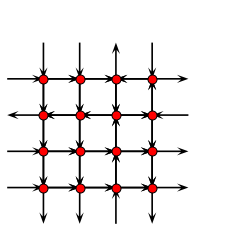

In [19]:
visualise_2d_model(arr)

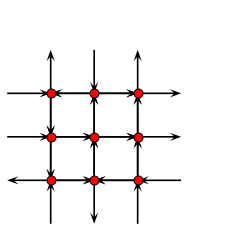

In [21]:
arr = np.array([[[ 1, -1],
        [-1,  1],
        [ 1,  1]],

       [[-1,  1],
        [ 1,  1],
        [ 1,  1]],

       [[-1,  1],
        [ 1, -1],
        [ 1, -1]]])
visualise_2d_model(arr)

In [153]:
tot_states,state_dict = count_states(2,1000,return_dict=True)

In [154]:
tot_states

18

In [155]:
state_dict

{'11111111': 128,
 '1-1-11-111-1': 53,
 '1-11-11111': 117,
 '1-11-11-11-1': 89,
 '-111-11-1-11': 57,
 '1-1-1-111-11': 77,
 '-1-1-1-1-11-11': 18,
 '-1111-1111': 69,
 '-11-11-11-11': 35,
 '-11-11-1-1-1-1': 28,
 '-1111-1-11-1': 41,
 '11-1111-11': 67,
 '11-111-1-1-1': 44,
 '-1-1-1-1-1-1-1-1': 25,
 '1-1-1-11-1-1-1': 47,
 '11111-11-1': 68,
 '-1-11-1-1111': 47,
 '-1-11-1-1-11-1': 48}

In [157]:
i="11111111"

In [158]:
arr = string_to_arr(i)


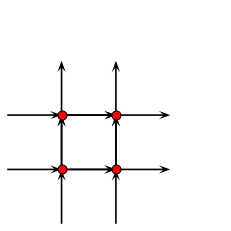

In [160]:
visualise_2d_model(arr)

In [ ]:
arr = string_to_arr(i)
#Column Translation symmetries
templist=get_all_column_translations(arr)
for t in templist:
    name = ' '.join(map(str, arr)).replace(' ','')
    if name in str_dict:
        del str_dict[name]

#Row Translation symmetries
templist=get_all_row_translations(arr)
for t in templist:
    name = ' '.join(map(str, arr)).replace(' ','')
    if name in str_dict:
        del str_dict[name]


#Check 90 degree rotation symmetry
name = ' '.join(map(str, rot90_anticlock(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]

#Check 180 degree rotation symmetry
name = ' '.join(map(str, rot180_anticlock(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]

#Check 270 degree rotation symmetry
name = ' '.join(map(str, rot270_anticlock(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]

#Check horizontal flip symmetry
name = ' '.join(map(str, hor_flip(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]

#Check vertical flip symmetry
name = ' '.join(map(str, ver_flip(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]

#Check secondary diagonal flip symmetry
name = ' '.join(map(str, flip_secondary_diag(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]

#Check primary diagonal flip symmetry
name = ' '.join(map(str, flip_primary_diag(arr).flatten())).replace(' ','')
if name in str_dict:
    del str_dict[name]    
return str_dict